In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data=pd.read_csv('abfss://c0bfb230-b305-467c-92d1-ca594c62c190@onelake.dfs.fabric.microsoft.com/7f6fceac-cc9d-4233-a25c-021aadab570d/Files/abalone.data')
data.head()

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 86, Finished, Available, Finished)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [85]:
data.info()

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 87, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [86]:
#checking correlations between features and rings
print(data.length.corr(data.rings))
print(data.diameter.corr(data.rings))
print(data.height.corr(data.rings))
print(data.whole_weight.corr(data.rings))
print(data.shucked_weight.corr(data.rings))
print(data.viscera_weight.corr(data.rings))
print(data.shell_weight.corr(data.rings))

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 88, Finished, Available, Finished)

0.556719576929618
0.5746598513059193
0.5574673244580375
0.5403896769239009
0.42088365794521443
0.503819248759771
0.6275740445103217


Each of the features show a high positive correlation with rings

In [87]:
figure=px.scatter(data_frame=data,x='length',y='rings',color='sex')
figure.show()


StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 89, Finished, Available, Finished)

In [88]:
figure=px.scatter(data_frame=data,x='diameter',y='rings',color='sex')
figure.show()

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 90, Finished, Available, Finished)

In [89]:
figure=px.scatter(data_frame=data,x='height',y='rings',color='sex')
figure.show()

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 91, Finished, Available, Finished)

In [90]:
figure=px.scatter(data_frame=data,x='whole_weight',y='rings',color='sex')
figure.show()

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 92, Finished, Available, Finished)

In [91]:
figure=px.scatter(data_frame=data,x='shucked_weight',y='rings',color='sex')
figure.show()

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 93, Finished, Available, Finished)

In [92]:
figure=px.scatter(data_frame=data,x='viscera_weight',y='rings',color='sex')
figure.show()

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 94, Finished, Available, Finished)

In [93]:
figure=px.scatter(data_frame=data,x='shell_weight',y='rings',color='sex')
figure.show()

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 95, Finished, Available, Finished)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 96, Finished, Available, Finished)

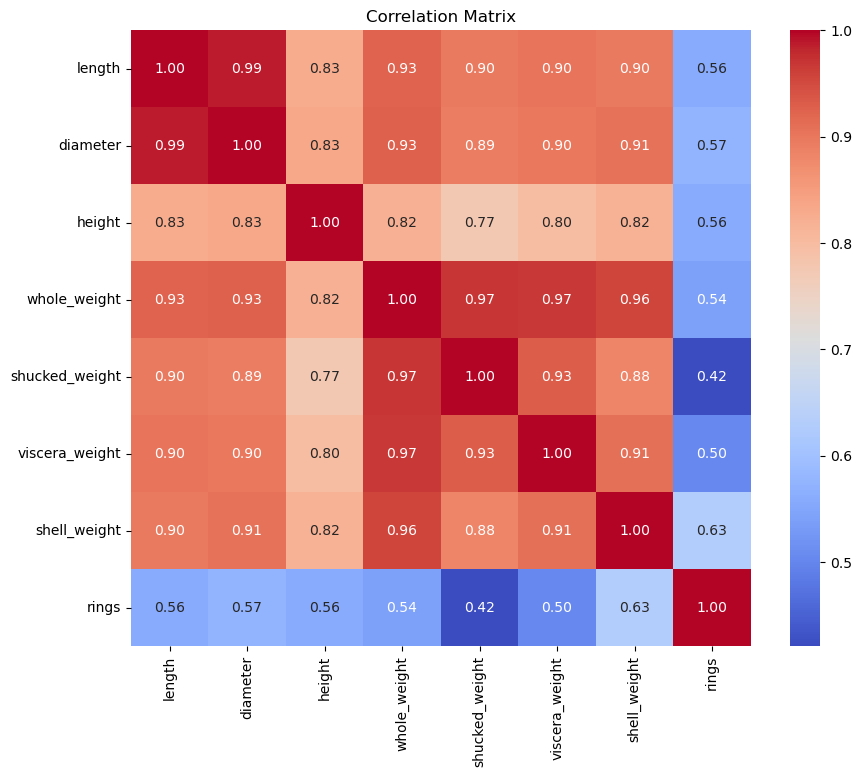

In [94]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [95]:
#Splitting the data
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(data,test_size=0.2,random_state=42)
print('train_df.shape:, ',train_df.shape)
print('test_df.shape:, ',test_df.shape)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 97, Finished, Available, Finished)

train_df.shape:,  (3341, 9)
test_df.shape:,  (836, 9)


In [96]:
X_train=train_df[['length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight']]
y_train=train_df['rings']
X_test=test_df[['length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight']]
y_test=test_df['rings']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 98, Finished, Available, Finished)

(3341, 7)
(3341,)
(836, 7)
(836,)


In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
experiment_name='ring_linearRegression'
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    mlflow.autolog()
    model=LinearRegression()
    model.fit(X_train,y_train)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 99, Finished, Available, Finished)

2024/07/30 22:53:07 INFO mlflow.tracking.fluent: Experiment with name 'ring_linearRegression' does not exist. Creating a new experiment.
2024/07/30 22:53:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/30 22:53:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024-07-30:22:53:14,243 WARNING  [tracking_store.py:153] log_inputs not supported


In [98]:
prediction=model.predict(X_test)
from sklearn.metrics import mean_squared_error
loss=mean_squared_error(y_test,prediction,squared=False)
print(loss)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 100, Finished, Available, Finished)

2024-07-30:22:53:19,847 WARNING  [tracking_store.py:153] log_inputs not supported


2.248453055836253


In [99]:
experiment_name='ring_ridgeregression'
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
    mlflow.autolog()
    model=Ridge()
    model.fit(X_train,y_train)
prediction=model.predict(X_test)
loss=mean_squared_error(y_test,prediction,squared=False)
print(loss)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 101, Finished, Available, Finished)

2024/07/30 22:53:21 INFO mlflow.tracking.fluent: Experiment with name 'ring_ridgeregression' does not exist. Creating a new experiment.
2024/07/30 22:53:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/30 22:53:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024-07-30:22:53:28,411 WARNING  [tracking_store.py:153] log_inputs not supported


2024-07-30:22:53:32,898 WARNING  [tracking_store.py:153] log_inputs not supported


2.2586812514235852


In [100]:
experiment_name='ring_lassoregression'
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
    mlflow.autolog()
    model=Lasso()
    model.fit(X_train,y_train)
prediction=model.predict(X_test)
loss=mean_squared_error(y_test,prediction,squared=False)
print(loss)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 102, Finished, Available, Finished)

2024/07/30 22:53:34 INFO mlflow.tracking.fluent: Experiment with name 'ring_lassoregression' does not exist. Creating a new experiment.
2024/07/30 22:53:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/30 22:53:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024-07-30:22:53:40,891 WARNING  [tracking_store.py:153] log_inputs not supported


2024-07-30:22:53:45,209 WARNING  [tracking_store.py:153] log_inputs not supported


3.290622953710525


In [101]:
experiment_name='ring_decisiontreeregressor'
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
    mlflow.autolog()
    model=DecisionTreeRegressor()
    model.fit(X_train,y_train)
prediction=model.predict(X_test)
loss=mean_squared_error(y_test,prediction,squared=False)
print(loss)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 103, Finished, Available, Finished)

2024/07/30 22:53:46 INFO mlflow.tracking.fluent: Experiment with name 'ring_decisiontreeregressor' does not exist. Creating a new experiment.
2024/07/30 22:53:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/30 22:53:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024-07-30:22:53:53,250 WARNING  [tracking_store.py:153] log_inputs not supported


2024-07-30:22:53:57,446 WARNING  [tracking_store.py:153] log_inputs not supported


3.1858313720441136


In [102]:
experiment_name='ring_randomforestregressor'
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
    mlflow.autolog()
    model=RandomForestRegressor()
    model.fit(X_train,y_train)
prediction=model.predict(X_test)
loss=mean_squared_error(y_test,prediction,squared=False)
print(loss)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 104, Finished, Available, Finished)

2024/07/30 22:53:59 INFO mlflow.tracking.fluent: Experiment with name 'ring_randomforestregressor' does not exist. Creating a new experiment.
2024/07/30 22:54:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/30 22:54:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024-07-30:22:54:06,18 WARNING  [tracking_store.py:153] log_inputs not supported


2024-07-30:22:54:12,91 WARNING  [tracking_store.py:153] log_inputs not supported


2.2602910586595835


In [103]:
experiment_name='ring_gradientboostingregressor'
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
    mlflow.autolog()
    model=Ridge()
    model.fit(X_train,y_train)
prediction=model.predict(X_test)
loss=mean_squared_error(y_test,prediction,squared=False)
print(loss)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 105, Finished, Available, Finished)

2024/07/30 22:54:14 INFO mlflow.tracking.fluent: Experiment with name 'ring_gradientboostingregressor' does not exist. Creating a new experiment.
2024/07/30 22:54:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/30 22:54:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024-07-30:22:54:20,555 WARNING  [tracking_store.py:153] log_inputs not supported


2024-07-30:22:54:24,744 WARNING  [tracking_store.py:153] log_inputs not supported


2.2586812514235852


In [104]:
experiment_name='ring_svr'
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
    mlflow.autolog()
    model=SVR()
    model.fit(X_train,y_train)
prediction=model.predict(X_test)
loss=mean_squared_error(y_test,prediction,squared=False)
print(loss)

StatementMeta(, 9c8399d4-70f9-46f7-850d-1d712f83793e, 106, Finished, Available, Finished)

2024/07/30 22:54:26 INFO mlflow.tracking.fluent: Experiment with name 'ring_svr' does not exist. Creating a new experiment.
2024/07/30 22:54:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/30 22:54:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024-07-30:22:54:33,503 WARNING  [tracking_store.py:153] log_inputs not supported


2024-07-30:22:54:39,721 WARNING  [tracking_store.py:153] log_inputs not supported


2.2533480579382674
